# Scikit-Learn

Machine learning describes the automatic discovery of regularities in data through the use of computer algorithms. Typically, *training* data are used to tune the parameters of an adaptive model during the learning / training phase. Once the model is trained, we can measure its performance on *test* data. If it performs well for new data, the model is said to have *generalized*. 

Applications where the training data comprises both input vectors and *target* vectors are referred to as **supervised** learning. Moreover, if the target vector consists of a finite number of discrete elements (i.e. labels or classes), the process is called *classification*. If the target vector consists of continuous data, it is called *regression*.

Tasks where labels/classes are not known are referred to as **unsupervised** learning. The goal may be to discover groups of similar examples, known as *clustering*, or to project the data from high-dimensional space to 2 or 3 dimensions for visualization, known as *dimensionality reduction*.

`scikit-learn` is a machine learning package for Python (install it via `conda install scikit-learn`)


It features:

* simple and efficient tools for data mining and data analysis
* built on `numpy`, `scipy`, `pandas`, and `matplotlib`
* open source, commercially usable - BSD license

http://scikit-learn.org/stable/user_guide.html

<img src="http://scikit-learn.org/stable/_static/ml_map.png"/>

from http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Quick Start Example

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(2012)

from sklearn import datasets, __version__
__version__

'0.19.1'

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0]  # 4-bit representation

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

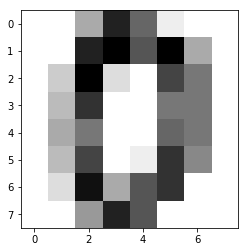

In [5]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='none');  # try also interpolation='bilinear'

In [6]:
digits.data.shape  # features in (n_samples, n_features) format

(1797, 64)

In [7]:
digits.data[0]  # simply the flattened image!

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [8]:
digits.target.shape

(1797,)

In [9]:
digits.target[0]  # the actual digit

0

The task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to then be able to predict the classes to which unseen samples belong.

In `scikit-learn`, an estimator (or model) for classification and regression is a Python object that implements the methods `fit(X, y)` and `predict(X)`.

An example of an estimator is the class `sklearn.svm.SVC` that implements *support vector* classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [10]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)  # manually and for now magically chosen model parameters

It is possible to automatically find good values for the model parameters by using tools such as *grid search* / *cross validation* (more on these below).

We call our estimator instance clf, as it is a classifier. It now must be fitted to the data, i.e. it must learn from the data. This is done by passing our training set to the fit method. As a training set, let us use all the images of our dataset except for a couple at the end, which we will use to test the classifier.

In [11]:
clf.fit(digits.data[:-2], digits.target[:-2])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
clf.predict(digits.data[-2:] )  # predict must be passed a 2d-array

array([9, 8])

array([9, 8])

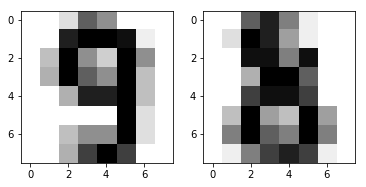

In [13]:
plt.subplot(1,2,1)
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='None')
plt.subplot(1,2,2)
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='None')
digits.target[-2:]

## Supervised learning: predicting an output variable from observations

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external target variable `y` that we are trying to classify or predict.

Specifically, if the prediction task is to classify the observations in a set of finite labels, in other words to name the objects observed, the task is said to be a *classification* task, and `y` is a vector of integers representing "(class) labels".

On the other hand, if the goal is to predict a continuous target variable, it is said to be a *regression* task, and `y` (or `Y` for multi-dimensional outputs) is a numeric matrix.

### Classification Examples

#### Creating training and testing partitions
Learning the parameters of a model function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has  seen (e.g. table lookup) would have a perfect score but would fail to generalize on yet-unseen data. This situation is called *overfitting*. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set.

In [14]:
from sklearn.model_selection import train_test_split

X, y = np.arange(20).reshape((10, 2)), np.arange(5).repeat(2)
X, y

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]]), array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4]))

In [15]:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, 
                   test_size=0.5,
                   random_state=42,
                   shuffle=True,  # try True or False
                   stratify=y  # try None or y
                  )

print(np.c_[X_train, y_train])
print('-' * 12)
print(np.c_[X_test, y_test])

[[14 15  3]
 [ 4  5  1]
 [10 11  2]
 [ 2  3  0]
 [18 19  4]]
------------
[[ 6  7  1]
 [ 0  1  0]
 [12 13  3]
 [16 17  4]
 [ 8  9  2]]


Now let's do this with the Iris data set:

In [16]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], 
       dtype='<U10'))

In [17]:
X.shape, y.shape

((150, 4), (150,))

In [18]:
X[0], y[0], iris.target_names[y[0]]

(array([ 5.1,  3.5,  1.4,  0.2]), 0, 'setosa')

In [19]:
assert len(set(y)) == 3

In [20]:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, 
                   test_size=0.1,
                   random_state=42,
                   shuffle=True,
                   stratify=y)
    
y_test

array([1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0])

#### k-Nearest neighbors (k-NN) classifier¶

The simplest possible classifier is the nearest neighbor: given a new observation, find in the training set (i.e. the data used to train the estimator) the observation with the "closest" feature vector.  

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
y_test_hat = knn.predict(X_test)
y_test_hat, y_test

(array([1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0]),
 array([1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0]))

#### Model Evaluation: Classification Metrics
There are many ways to evaluate model performance. Some metrics require binary labels:
  * Precision-recall curve
  * Receiver operating characteristic (ROC)
  
Others also work in the multi-class case:
  * Cohen’s kappa: a statistic that measures inter-annotator agreement
  * Confusion matrix
  
Yet others also work in the multibabel case:
  * Accuracy score
  * F1 score

There are many others (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). For a review of precision, recall, and F1, see https://en.wikipedia.org/wiki/F1_score; for a review of ROC see https://en.wikipedia.org/wiki/Receiver_operating_characteristic.

For a brief per-class report, you can use the `classification_report` function:

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_hat))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         5
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15



Models also have a built-in method `score` which is the recommended default manner of evaluation for that model:

In [23]:
help(knn.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [24]:
knn.score(X_test, y_test)

1.0

#### Decision Trees Classifier
Decision trees create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [25]:
from sklearn import tree

dct = tree.DecisionTreeClassifier()
dct = dct.fit(X_train, y_train)
y_test_hat = dct.predict(X_test)
dct.score(X_test, y_test)

0.8666666666666667

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       0.80      0.80      0.80         5
          2       0.80      0.80      0.80         5

avg / total       0.87      0.87      0.87        15



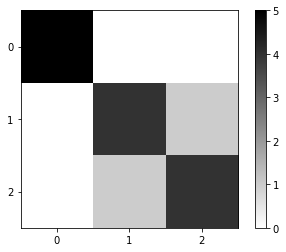

In [26]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_test_hat))
cfs = confusion_matrix(y_test, y_test_hat)

plt.imshow(cfs, interpolation='none', cmap='gray_r')
plt.colorbar();
plt.xticks(np.arange(3))
plt.yticks(np.arange(3));

To see what the decision tree looks like, additional tools are needed. Install them via `conda install python-graphviz`. Then you can do:

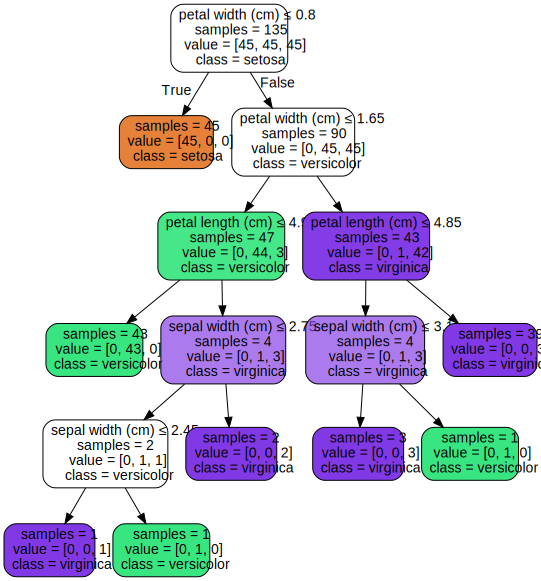

In [27]:
import graphviz

dot_data = tree.export_graphviz(dct, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         impurity=False,
                         filled=True, 
                         rounded=True,  
                         leaves_parallel=False,
                         special_characters=True)  
graphviz.Source(dot_data)

#### Support vector machines¶

*Support Vector Machines* (SVMs) belong to the discriminant model family (as opposed to the generative model family): they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by a $C$ parameter: 

* a large value for $C$ means the margin is calculated on observations close to the separating line (less regularization).
* a small value for $C$ means the margin is calculated using many or all of the observations around the separating line (more regularization)

To give a bit of intuition, an example where $C=1$:
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_001.png)
and where $C=0.05$:
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_002.png)

SVMs can be used in regression (SVR - Support Vector Regression), or in classification (SVC - Support Vector Classification). Let's apply an SVC to the iris data:

In [28]:
X = iris.data[:, :2]  # Consider only the first two features
y = iris.target

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, 
                   test_size=0.1,
                   random_state=42,
                   shuffle=y)

X_train.mean(), X_train.std()

(4.4437037037037035, 1.5393653048702034)

For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good predictions.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # only on training data!
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test) 

assert np.isclose(X_train.mean(), 0)
assert np.isclose(X_train.std(), 1)

Classes are not always linearly separable in feature space. The solution is to use *non-linear kernels*. Let's compare the different kernels:

model SVC with linear kernel scored 0.8666666666666667
model SVC with RBF kernel scored 0.8666666666666667
model SVC with polynomial (degree 3) kernel scored 0.8


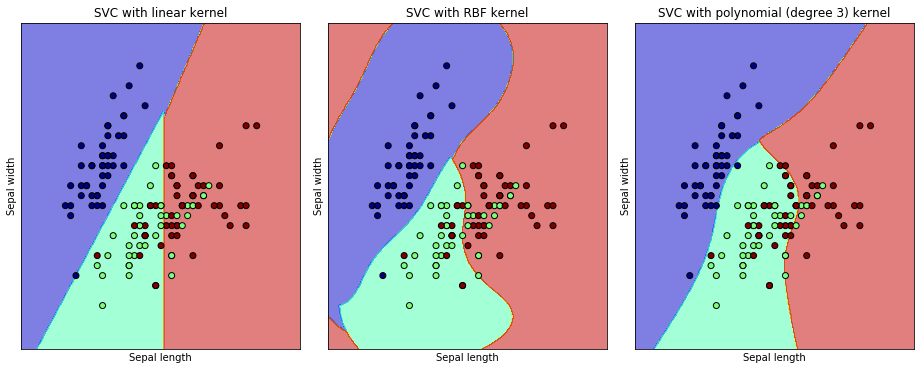

In [30]:
from sklearn import svm

C = 0.99  # SVM regularization parameter
# vary this from nearly 1 (less regularization) to nearly 0 (more regularization)

clfs = {'SVC with linear kernel': 
          svm.SVC(kernel='linear', C=C), # slightly different from LinearSVC, 
        'SVC with RBF kernel': 
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
        'SVC with polynomial (degree 3) kernel':
          svm.SVC(kernel='poly', degree=3, C=C)}

h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.1, hspace=0.2)
for i, (title, clf) in enumerate(clfs.items()):
    plt.subplot(1, 3, i + 1)
    plt.title(title)
    # predict values "everywhere"
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.jet, alpha=0.5)
    # training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.jet, edgecolor='k')
    plt.xlabel('Sepal length'); plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max()); plt.ylim(yy.min(), yy.max())
    plt.xticks(()); plt.yticks(())
    # evaluate
    score = clf.score(X_test, y_test)
    print(f"model {title} scored {score}")

Other classifiers are available, here is a comparison of some of them:
<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png"/>

### Regression Examples

In [31]:
diabetes = datasets.load_diabetes()
# input: 10 physiological variables (including age, sex, weight, blood pressure)
# target: an indication of disease progression after one year

X = diabetes.data; y = diabetes.target
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, 
                   test_size=0.1,
                   random_state=42,
                   shuffle=y)  # we cannot stratify here in a straight-forward manner
    
X_train[0], y_train[0]

(array([-0.01641217, -0.04464164, -0.03530688, -0.02632783,  0.03282986,
         0.01716188,  0.10018303, -0.03949338, -0.07020931, -0.07977773]),
 52.0)

#### Linear Regression
The simplest form of regression is *Linear Regression*, which fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear models: $y = X\beta + \epsilon$

with $X$: data, $y$: target variable, $\beta$: Coefficients, $\epsilon$: Observation noise

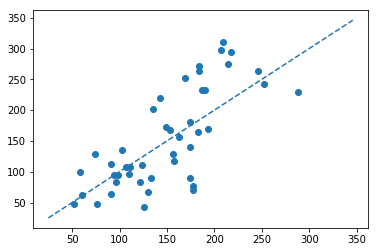

In [32]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_test_hat = regr.predict(X_test)

plt.scatter(y_test_hat, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--');  # drawing y=x line

#### Regression Metrics
Many other performance functions exist, such as the classic `mean_squared_error`, `explained_variance_score`, `mean_absolute_error`, `median_absolute_error` (robust to outliers), and `r2_score` (a measure of how well future samples are likely to be predicted). All available metrics can be found at http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics.

Let's see what the built-in method is for `LinearRegression`:

In [33]:
help(regr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float


In [34]:
regr.score(X_train, y_train)

0.51251522487732082

In [35]:
from sklearn.metrics import mean_squared_error as mse

mse(regr.predict(X_test), y_test)

2743.8800467688443

#### k-Nearest neighbors (k-NN) regression¶

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.45890212800998509

In [37]:
mse(knn.predict(X_test), y_test)

3309.8328888888886

Many other regression approaches are available, see the documentation (http://scikit-learn.org/stable/supervised_learning.html) for details.

### Cross-validation
#### Evaluating scores

As we have seen, every estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data; larger numbers mean a better fit. For example:

In [38]:
X = digits.data
y = digits.target
svc = svm.SVC(kernel='linear')
b = -100  # boundary between training and test data
svc.fit(X[:b], y[:b]).score(X[b:], y[b:])

0.97999999999999998

But what if the test set was somehow chosen in a particularly bad or good way, even if all precautions werer taken?

To get a better measure of prediction accuracy (which is a *random variable*, and which represents the goodness of fit of the model), we can successively split the data in folds that we use for training and testing, also called *K-Fold cross-validation*. In this approach, the training set is first split into K smaller sets. Then, a model is trained using K-1 of the folds as training data. Finally, the resulting model is evaluated using the remaining part of the data (the final fold).

In [39]:
from sklearn.model_selection import KFold  

kfd = KFold(n_splits=3)  # n_repeats make sense when there is random initialization
for train_indices, test_indices in kfd.split(np.arange(6)):   # use just 6 data points so we can track this
     print(f'train: {train_indices} | test: {test_indices}')

train: [2 3 4 5] | test: [0 1]
train: [0 1 4 5] | test: [2 3]
train: [0 1 2 3] | test: [4 5]


In [40]:
scores = [svc.fit(digits.data[train], digits.target[train]) \
          .score(digits.data[test], digits.target[test])
         for train, test in kfd.split(X)]
print(scores)
print(np.mean(scores))

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]
0.943795214246


We can be more confident in the average score. Because this approach is used so often, there is a built-in call:

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X, y,  # uses model's built-in score method by default
                         cv=3,  # specifies n_splits for KFolds when integer
                         n_jobs=-1)  # run on all available CPU cores
scores.mean()

0.94379972762867548

There is also a more general `cross_validate` function that allows for multiple metrics simultaneously.

Other *cross-validation generators* (that you can use directly or pass to the `cv` keyword) include:

* `RepeatedKFold`: repeats K-Fold n times with different randomization in each repetition
* `RepeatedStratifiedKFold`: preserves the class ratios / label distribution within each fold
* `LeaveOneOut`: leave exactly one observation out
* `LeavePOut`: leave P observations out

#### Optimizing Hyper-parameters
Hyper-parameters are parameters that are not directly learnt within estimators; instead, they are passed as arguments to the constructor of the estimator classes. It is possible and recommended to search the hyper-parameter space for the best cross validation (CV) score:

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf'],   
               'C': [1, 10, 100, 1000], 
               'gamma': [1e-3, 1e-4, 'auto']},
              {'kernel': ['linear'], 
               'C': [1, 10, 100, 1000]}]

hyp = GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=-1)
hyp.fit(X, y)
hyp.best_params_, hyp.best_score_

({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.97273233166388429)

#### Nested optimization and evaluation
Nested cross-validation (CV) is often used to combine CV for evaluation *and* CV for hyper-parameter optimization. Model training without nested CV uses the same data to optimize model hyper-parameters *and* evaluate model performance, which can cause *test* data to “leak” into the *training* of the model, potentially causing overfitting.

In [43]:
from sklearn.model_selection import StratifiedKFold

inner_cv = StratifiedKFold(n_splits=4, shuffle=True)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True)

hyp = GridSearchCV(svm.SVC(), param_grid, 
                   cv=inner_cv,  # explicit specification of inner loop
                   n_jobs=-1)
scores = cross_val_score(hyp, X, y,
                         cv=outer_cv,  # explicit specification of outer loop
                         n_jobs=1)  # cannot have parallel nested loops
scores.mean()

0.98609044622905984

#### Using pipelines
Pipelines are useful to integrate several steps into a new "model":

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), svm.SVC())
param_grid = [{'svc__kernel': ['rbf'],
               'svc__C': [0.01, 0.1, 1, 10, 100],
               'svc__gamma': [1e-3, 1e-4, 'auto']},
              {'svc__kernel': ['linear'],
               'svc__C': [0.01, 0.1, 1, 10, 100]}]
# the param_grid keywords have to match keys in pipe.get_params().keys()

hyp = GridSearchCV(pipe, param_grid, 
                    cv=inner_cv,
                    n_jobs=-1)

scores = cross_val_score(hyp, X, y,
                         cv=outer_cv,
                         scoring='r2',
                         n_jobs=1) 
scores.mean()

0.95059405338404313

Although, in this case using the StandardScaling didn't help.
## Unsupervised learning: seeking representations of the data
### Clustering: grouping observations together
The problem solved in clustering: For example, given the iris dataset, if we knew that there were 3 types of iris, but did not have access to a taxonomist to label them: we could try a clustering task: split the observations into well-separated group called clusters.

#### K-means clustering
Note that there exist a lot of different clustering criteria and associated algorithms. The simplest clustering algorithm is K-means.

In [45]:
from sklearn import cluster

X = iris.data
y = iris.target

k_means = cluster.KMeans(n_clusters=3)  # vary the number of clusters
y_hat = k_means.fit_predict(X) 

print(y_hat[::10])  # look at every 10th one
print(y    [::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Warning: There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minima, although `scikit-learn` employs several tricks to mitigate this issue. **Don’t over-interpret clustering results**.

Clustering can also be used to posterize an image:

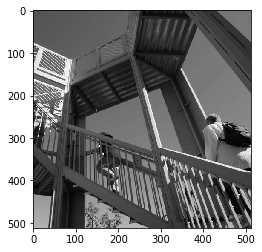

In [46]:
from scipy import misc

img = misc.ascent()
plt.imshow(img, cmap=plt.cm.gray);

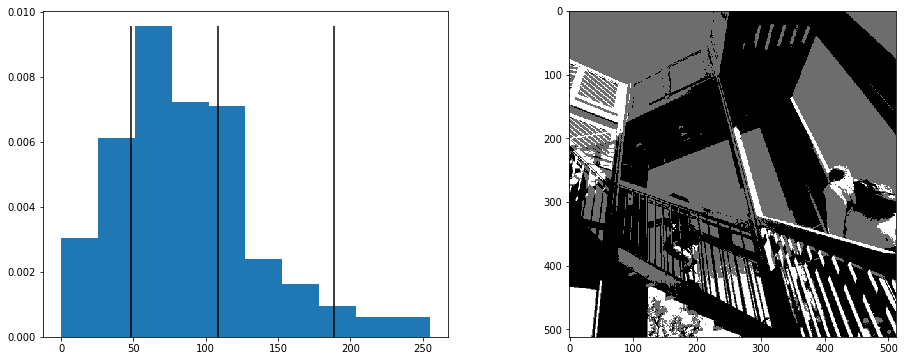

In [47]:
X = img.reshape((-1, 1))  # We need an (n_sample=1, n_feature) array

K = 3  # number of levels of gray
k_means = cluster.KMeans(n_clusters=K, n_init=5)
y_hat = k_means.fit_predict(X) 

img_compressed = np.choose(y_hat, k_means.cluster_centers_)
img_compressed.shape = img.shape

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
H = plt.hist(X, density=True)
plt.vlines(k_means.cluster_centers_, ymin=0, ymax=H[0].max())
plt.subplot(1,2,2)
plt.imshow(img_compressed, cmap=plt.cm.gray);

Other clustering algorithms are available, here is a comparison:
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### Decompositions / Dimensionality Reduction
If X is our multivariate data, then the problem that we are trying to solve is to rewrite it on a different observational basis: we want to learn *loadings* L and a set of *components* C such that $X = L C$. Different criteria exist to choose the components.
#### Principal component analysis (PCA)¶
PCA selects the successive components that explain the maximum variance in the signal. When used to transform data, PCA can reduce the dimensionality of the data by projecting on a principal subspace.

[  2.91540008e+00   1.00118516e+00   7.13389069e-33]


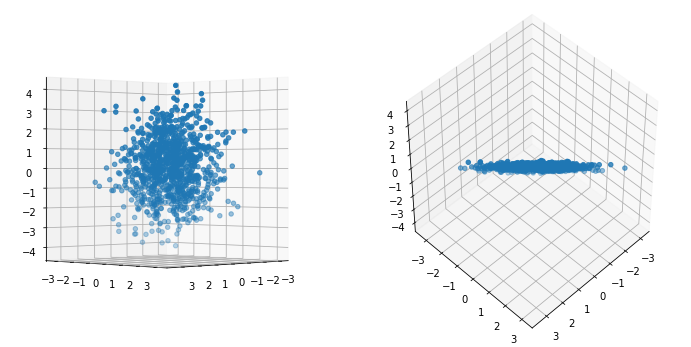

In [48]:
from sklearn.decomposition import PCA

x1 = np.random.normal(size=1000)  # create a signal with only 2 useful dimensions
x2 = np.random.normal(size=1000)
x3 = x1 + x2  # linear combination of dim-1 and dim-2
X = np.c_[x1, x2, x3]  # 2D data embedded in 3D space

pca = PCA()
pca.fit(X)
print(pca.explained_variance_)
assert np.allclose(pca.explained_variance_[-1], 0)  # only the 2 first components are useful

pca.n_components = 1  # vary this???
X_reduced_pca = pca.transform(X)
assert np.allclose(X,  X_reduced_pca @ pca.components_ + pca.mean_)  # reconstruction

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1, projection='3d', elev=0, azim=45)
ax1.scatter(x1, x2, x3);  # looks like it could be 3D
ax2 = fig.add_subplot(1,2,2, projection='3d', elev=45, azim=45)
ax2.scatter(x1, x2, x3);  # looks like a line, so the data is actually in a plane

#### Linear Discriminant Analysis (LDA)
LDA tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA and ICA, is a *supervised* method, using known class labels. (We mention it here because of its similarities to PCA).

Comparison of LDA and PCA 2D projections of the Iris dataset:

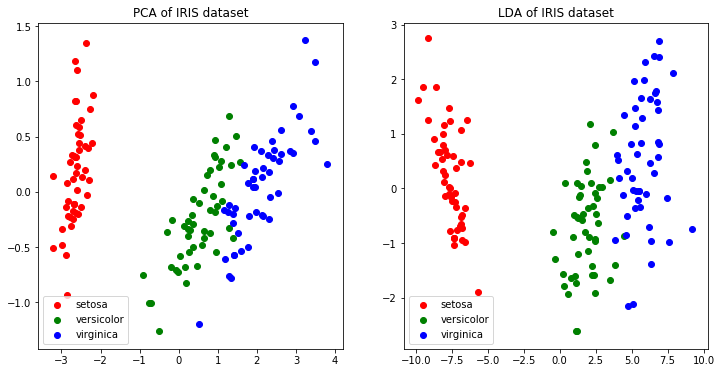

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_r1 = pca.fit_transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Create plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    ax1.scatter(X_r1[y == i, 0], X_r1[y == i, 1], c=c, label=target_name)
ax1.legend()
ax1.set_title('PCA of IRIS dataset')
for c, i, target_name in zip("rgb", [0, 1, 2], iris.target_names):
    ax2.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
ax2.legend()
ax2.set_title('LDA of IRIS dataset');

Many other approaches to Dimensionality Reduction are available, including
* Decomposition
    * Independent Component Analysis (ICA)
    * Non-negative Matrix Factorization (NMF)
* Manifold Learning
    * Isomap
    * Multi-Dimensional Scaling (MDS)
    * t-distributed Stochastic Neighbor Embedding (t-SNE).